In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
news_df = pd.read_csv("/content/drive/MyDrive/Capstone B/WELFake_Dataset.csv")
news_df = news_df[['text', 'label']].dropna()

# Encode labels
le = LabelEncoder()
news_df['label'] = le.fit_transform(news_df['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    news_df['text'], news_df['label'], test_size=0.20, random_state=19)

# Tokenize the text
max_words = 5000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have consistent length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Build the LSTM model
embedding_dim = 50  # You can adjust this based on your dataset
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train_padded, y_train, epochs=5, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on new data
news = ["The left believes these are all perfectly acceptable topics to discuss with our young children..."]
news_sequences = tokenizer.texts_to_sequences(news)
news_padded = pad_sequences(news_sequences, maxlen=max_sequence_length, padding='post')
prediction = model.predict(news_padded)
print(prediction)


Epoch 1/5
1442/1442 [==============================] - 160s 109ms/step - loss: 0.2488 - accuracy: 0.9007 - val_loss: 0.1789 - val_accuracy: 0.9352
Epoch 2/5
1442/1442 [==============================] - 153s 106ms/step - loss: 0.1751 - accuracy: 0.9354 - val_loss: 0.1756 - val_accuracy: 0.9366
Epoch 3/5
1442/1442 [==============================] - 160s 111ms/step - loss: 0.1344 - accuracy: 0.9527 - val_loss: 0.1821 - val_accuracy: 0.9342
Epoch 4/5
1442/1442 [==============================] - 154s 107ms/step - loss: 0.1119 - accuracy: 0.9608 - val_loss: 0.1711 - val_accuracy: 0.9389
Epoch 5/5
451/451 [==============================] - 13s 29ms/step - loss: 0.1800 - accuracy: 0.9374
Test Loss: 0.18003959953784943
Test Accuracy: 0.9373742938041687
1/1 [==============================] - 1s 555ms/step
[[0.97845095]]


451/451 [==============================] - 14s 31ms/step - loss: 0.1800 - accuracy: 0.9374
LSTM Test Loss: 0.18003959953784943
LSTM Test Accuracy: 0.9373742938041687
451/451 [==============================] - 15s 33ms/step


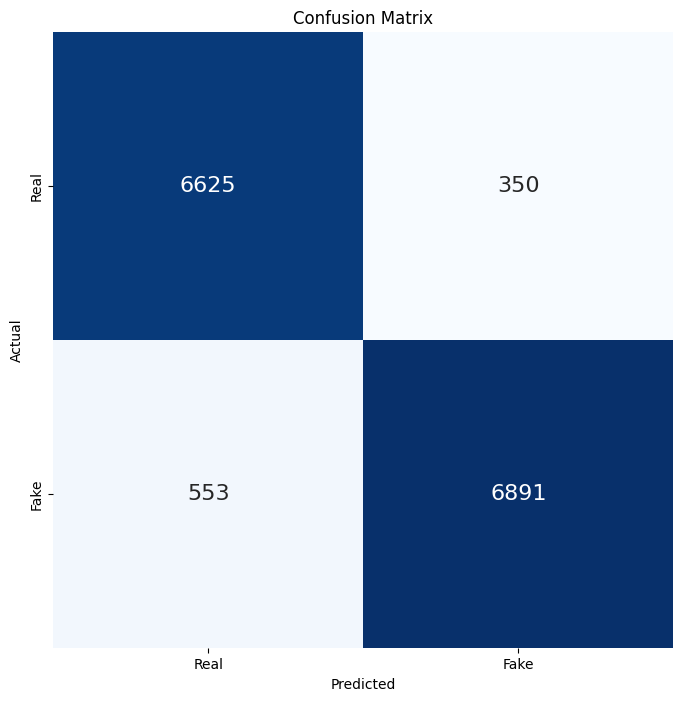

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, labels):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# LSTM model
# ... (previous LSTM code)

# Evaluate the LSTM model on the test set
loss_lstm, accuracy_lstm = model.evaluate(X_test_padded, y_test)
print("LSTM Test Loss:", loss_lstm)
print("LSTM Test Accuracy:", accuracy_lstm)

# Plot confusion matrix for LSTM model
plot_confusion_matrix(model, X_test_padded, y_test, labels=['Real', 'Fake'])



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import classification_report

# Function to print classification report
def print_classification_report(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Print classification report
    report = classification_report(y_test, y_pred_classes, target_names=['Real', 'Fake'])
    print("Classification Report:\n", report)

# LSTM model
# ... (previous LSTM code)

# Evaluate the LSTM model on the test set
loss_lstm, accuracy_lstm = model.evaluate(X_test_padded, y_test)
print("LSTM Test Loss:", loss_lstm)
print("LSTM Test Accuracy:", accuracy_lstm)

# Print classification report for LSTM model
print_classification_report(model, X_test_padded, y_test)


451/451 [==============================] - 14s 31ms/step - loss: 0.1800 - accuracy: 0.9374
LSTM Test Loss: 0.18003959953784943
LSTM Test Accuracy: 0.9373742938041687
451/451 [==============================] - 14s 30ms/step
Classification Report:
               precision    recall  f1-score   support

        Real       0.92      0.95      0.94      6975
        Fake       0.95      0.93      0.94      7444

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419

